In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2023-04-20 20:39:32.835507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


2023-04-20 20:39:39.091132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 20:39:39.092643: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 2 0 1 1 1 1 1 1 0 1 0 0 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[173. 176. 193.]
  [166. 169. 186.]
  [168. 171. 188.]
  ...
  [195. 197. 210.]
  [172. 174. 187.]
  [ 70.  72.  85.]]

 [[166. 169. 186.]
  [166. 169. 186.]
  [169. 172. 189.]
  ...
  [156. 158. 171.]
  [145. 147. 160.]
  [182. 184. 197.]]

 [[164. 167. 184.]
  [171. 174. 191.]
  [174. 177. 194.]
  ...
  [143. 145. 158.]
  [163. 165. 178.]
  [120. 122. 135.]]

 ...

 [[180. 182. 194.]
  [175. 177. 189.]
  [172. 174. 186.]
  ...
  [187. 184. 195.]
  [106. 103. 114.]
  [152. 149. 160.]]

 [[176. 178. 190.]
  [168. 170. 182.]
  [165. 167. 179.]
  ...
  [109. 106. 117.]
  [147. 144. 155.]
  [152. 149. 160.]]

 [[167. 169. 181.]
  [159. 161. 173.]
  [157. 159. 171.]
  ...
  [146. 143. 154.]
  [136. 133. 144.]
  [ 98.  95. 106.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[159. 153. 155.]
  [158. 152. 154.]
  [160. 154. 156.]
  ...
  [171. 166. 170.]
  [166. 161. 165.]
  [161. 156. 160.]]

 [[151. 145. 147.]
  [151. 145. 147.]
  [154. 148. 150.]
  ...
  [171. 166. 170.]
  [167. 162. 166.]
  [162. 157. 161.]]

 [[146. 140. 142.]
  [146. 140. 142.]
  [151. 145. 147.]
  ...
  [170. 165. 169.]
  [167. 162. 166.]
  [164. 159. 163.]]

 ...

 [[137. 127. 126.]
  [147. 137. 136.]
  [138. 128. 127.]
  ...
  [166. 157. 160.]
  [175. 166. 169.]
  [185. 176. 179.]]

 [[142. 132. 131.]
  [138. 128. 127.]
  [136. 126. 125.]
  ...
  [165. 156. 159.]
  [179. 170. 173.]
  [152. 143. 146.]]

 [[128. 118. 117.]
  [123. 113. 112.]
  [138. 128. 127.]
  ...
  [164. 155. 158.]
  [138. 129. 132.]
  [173. 164. 167.]]]


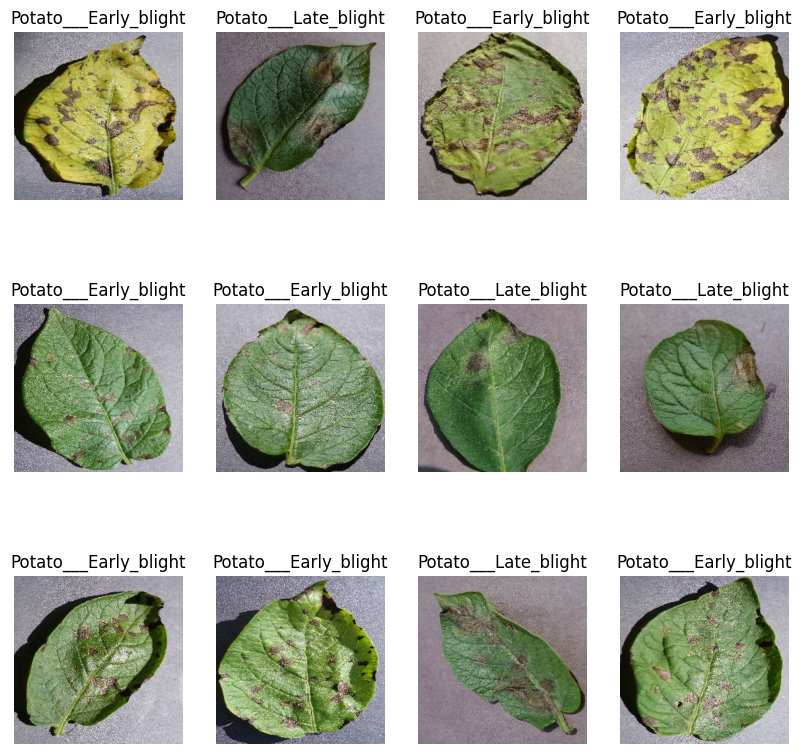

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

68

In [12]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(
        height_factor=(-0.05, -0.15),
        width_factor=(-0.05, -0.15)
    )
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
history = model.fit(
    train_ds, 
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 174s 3s/step - loss: 0.8965 - accuracy: 0.5150 - val_loss: 0.7366 - val_accuracy: 0.5885
Epoch 2/50
54/54 [==============================] - 168s 3s/step - loss: 0.7072 - accuracy: 0.7089 - val_loss: 0.4811 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 158s 3s/step - loss: 0.5013 - accuracy: 0.7998 - val_loss: 0.6627 - val_accuracy: 0.7500
Epoch 4/50
54/54 [==============================] - 149s 3s/step - loss: 0.4160 - accuracy: 0.8385 - val_loss: 0.3749 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 169s 3s/step - loss: 0.3169 - accuracy: 0.8750 - val_loss: 0.8173 - val_accuracy: 0.7240
Epoch 6/50
54/54 [==============================] - 166s 3s/step - loss: 0.2930 - accuracy: 0.8895 - val_loss: 0.8628 - val_accuracy: 0.7656
Epoch 7/50
54/54 [==============================] - 137s 3s/step - loss: 0.2562 - accuracy: 0.9034 - val_loss: 0.6979 - val_accuracy: 0.7812
Epoch 8/50
54

54/54 [==============================] - 168s 3s/step - loss: 0.1843 - accuracy: 0.9248 - val_loss: 0.3500 - val_accuracy: 0.8542
Epoch 12/50
54/54 [==============================] - 163s 3s/step - loss: 0.1412 - accuracy: 0.9433 - val_loss: 0.2777 - val_accuracy: 0.9062
Epoch 13/50
54/54 [==============================] - 162s 3s/step - loss: 0.1232 - accuracy: 0.9514 - val_loss: 0.8089 - val_accuracy: 0.7917
Epoch 14/50
54/54 [==============================] - 161s 3s/step - loss: 0.1201 - accuracy: 0.9554 - val_loss: 0.3048 - val_accuracy: 0.9010
Epoch 15/50
54/54 [==============================] - 168s 3s/step - loss: 0.0822 - accuracy: 0.9682 - val_loss: 0.6419 - val_accuracy: 0.8646
Epoch 16/50
54/54 [==============================] - 157s 3s/step - loss: 0.0969 - accuracy: 0.9670 - val_loss: 0.6490 - val_accuracy: 0.8594
Epoch 17/50
54/54 [==============================] - 135s 2s/step - loss: 0.1259 - accuracy: 0.9589 - val_loss: 0.3546 - val_accuracy: 0.8802
Epoch 18/50
54/54 

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 406ms/step - loss: 0.0797 - accuracy: 0.9688


In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys

<function dict.keys>

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.5150462985038757,
 0.7089120149612427,
 0.7997685074806213,
 0.8385416865348816,
 0.875,
 0.8894675970077515,
 0.9033564925193787,
 0.9155092835426331,
 0.9108796119689941,
 0.9276620149612427,
 0.9247685074806213,
 0.9432870149612427,
 0.9513888955116272,
 0.9554398059844971,
 0.9681712985038757,
 0.9670138955116272,
 0.9589120149612427,
 0.9652777910232544,
 0.9728009104728699,
 0.9612268805503845,
 0.9508101940155029,
 0.9785879850387573,
 0.9866898059844971,
 0.9739583134651184,
 0.9739583134651184,
 0.9768518805503845,
 0.9745370149612427,
 0.9895833134651184,
 0.984375,
 0.9895833134651184,
 0.9849537014961243,
 0.9664351940155029,
 0.9780092835426331,
 0.9872685074806213,
 0.9890046119689941,
 0.9913194179534912,
 0.9849537014961243,
 0.9884259104728699,
 0.9942129850387573,
 0.9820601940155029,
 0.9890046119689941,
 0.9774305820465088,
 0.9814814925193787,
 0.9895833134651184,
 0.9971064925193787,
 0.9918981194496155,
 0.9855324029922485,
 0.9936342835426331,
 0.984953701496

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

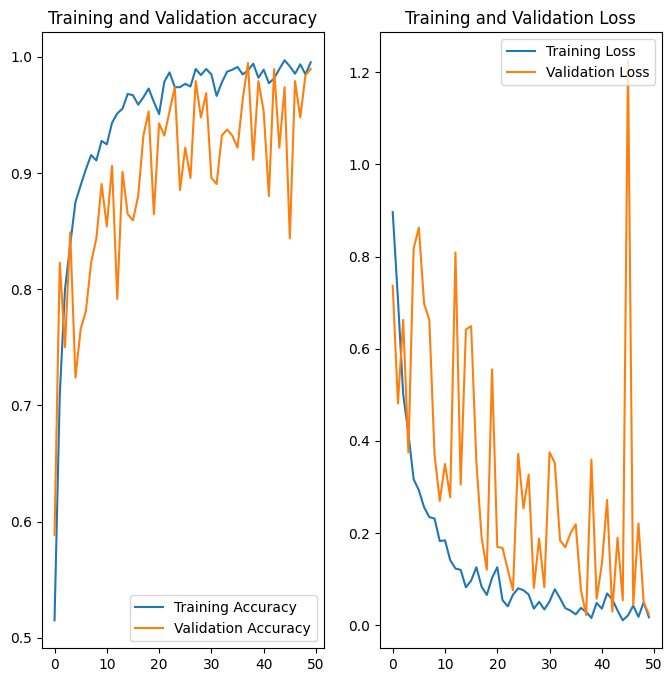

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 366ms/step
predicted label: Potato___Early_blight


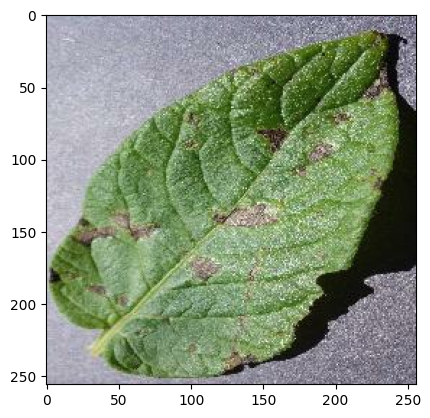

In [59]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])